In [33]:
# Dane do analizy: MNIST.csv (Modified National Institute of Standards and Technology database)
# Cel badania: Analiza algorytmu selekcji cech PCA . 
# Wizualizacja danych  za pomocą PCA i t-SNE

import pandas as pd
from Cwiczenia4.mnist import DataHandler
import os

# Zadanie 1 - Ładowanie zbioru treningowego, testowego, wstępna analiza  i dodawanie nazw dla kolumn

data_dir = '/Users/michallejza/Desktop/Data/MNIST/classic'
train_images_path = os.path.join(data_dir, 'train-images')
train_labels_path = os.path.join(data_dir, 'train-labels')
test_images_path = os.path.join(data_dir, 'test-images')
test_labels_path = os.path.join(data_dir, 'test-labels')

train_data = DataHandler(train_images_path, train_labels_path)
test_data = DataHandler(test_images_path, test_labels_path)

train_images = pd.DataFrame(train_data.images)
train_labels = pd.DataFrame(train_data.labels)
test_images = pd.DataFrame(test_data.images)
test_labels = pd.DataFrame(test_data.labels)

train_images.columns = [f'pixel{i+1}' for i in range(train_images.shape[1])]
test_images.columns = [f'pixel{i+1}' for i in range(test_images.shape[1])]

print(f"Ilość obrazów zbioru treningowego: {train_images.shape[0]}")
print(f"Ilość obrazów zbioru testowego: {test_images.shape[0]}")
print(f"Ilosc pikseli w każdym obrazie: {train_images.shape[1]}")

Ilość obrazów zbioru treningowego: 60000
Ilość obrazów zbioru testowego: 10000
Ilosc pikseli w każdym obrazie: 784


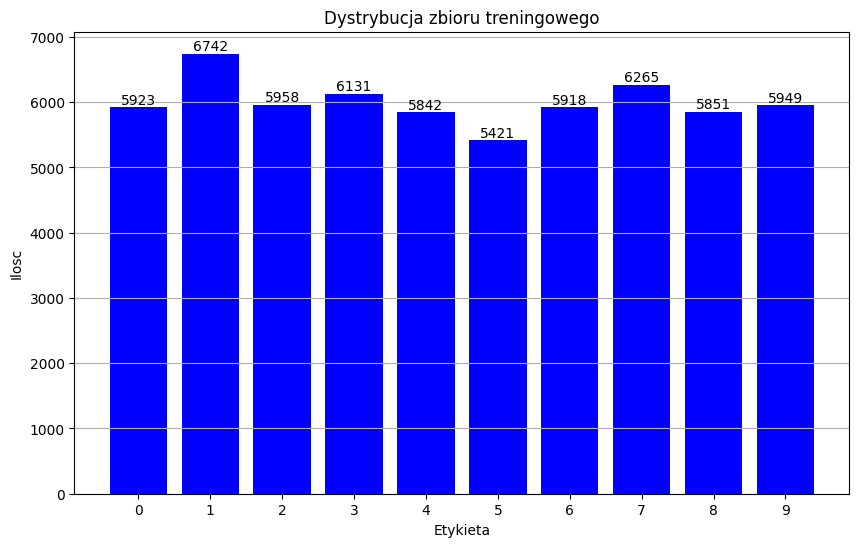

In [2]:
import numpy as np
import matplotlib.pyplot as plt

labelList, labelCount = np.unique(train_labels, return_counts=True)
plt.figure(figsize=(10, 6))
bars = plt.bar(labelList, labelCount, color='blue')
plt.xticks(range(10))
plt.xlabel('Etykieta')
plt.ylabel('Ilosc')
plt.title('Dystrybucja zbioru treningowego')
plt.grid(axis='y')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom', fontsize=10)
plt.show()


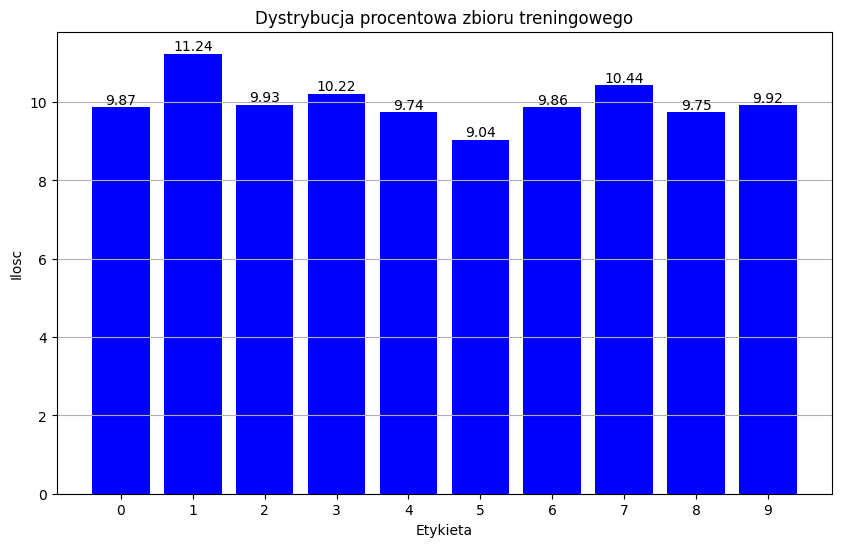

In [3]:
labelList, labelCount = np.unique(train_labels, return_counts=True)
labelPercentage = labelCount / len(train_labels) * 100
plt.figure(figsize=(10, 6))
bars = plt.bar(labelList, labelPercentage, color='blue')
plt.xticks(range(10))
plt.xlabel('Etykieta')
plt.ylabel('Ilosc')
plt.title('Dystrybucja procentowa zbioru treningowego')
plt.grid(axis='y')
for bar in bars:
    yval = float(format(bar.get_height(), '.2f'))
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom', fontsize=10)
plt.show()

In [16]:
# Zadanie 2 - Algorytm PCA

from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(train_images)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.9) + 1
print(f"Liczba wymiarów: {d}")

Liczba wymiarów: 87


In [17]:
pca = PCA(n_components=d)
train_images_reduced = pca.fit_transform(train_images)
print(f"Liczba wymiarów PCA: {pca.n_components}")
print(f"Wartość wyjaśnionej wariancji {np.sum(pca.explained_variance_ratio_)}")

pca1 = PCA(n_components=10)
low = pca1.fit_transform(train_images)
sumLow = np.sum(pca1.explained_variance_ratio_)
pca2 = PCA(n_components=150)
high = pca2.fit_transform(train_images)
sumHigh = np.sum(pca2.explained_variance_ratio_)
print(f"Zakres wyjaśnionej wariancji dla przedziału wymiarów [10, 150]:")
print(f"[{sumLow:.4f}, {sumHigh:.4f}]")

Liczba wymiarów PCA: 87
Wartość wyjaśnionej wariancji 0.9001062226425088
Zakres wyjaśnionej wariancji dla przedziału wymiarów [10, 150]:
[0.4881, 0.9484]


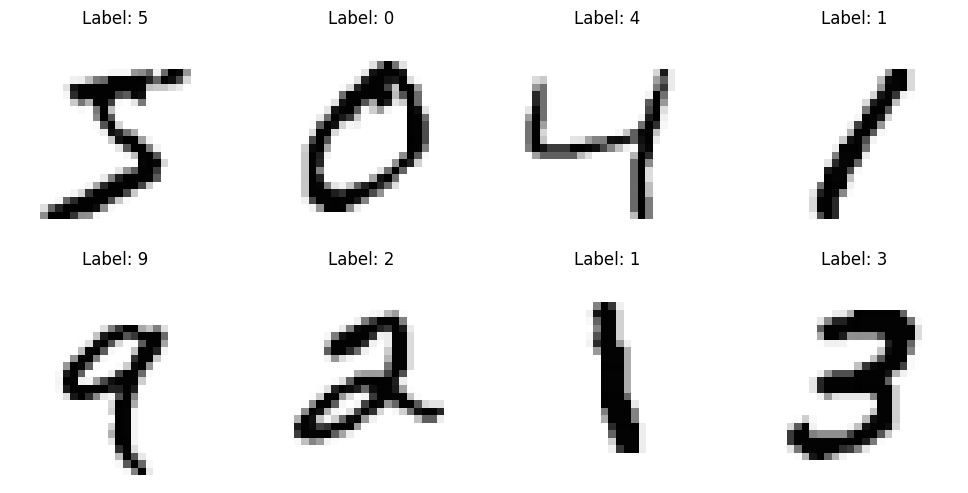

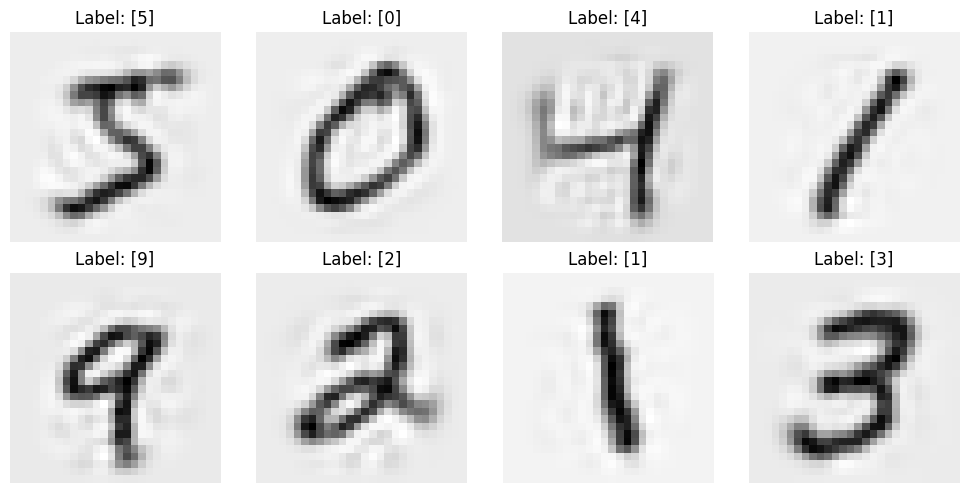

In [18]:
# Zadanie 3

train_images_reduced_np = pca.transform(train_images)
train_images_recovered_np = pca.inverse_transform(train_images_reduced)
train_images_reduced = pd.DataFrame(train_images_reduced_np)
train_images_recovered = pd.DataFrame(train_images_recovered_np)

train_data.showFirstEightImages()
number = 8
plt.figure(figsize=(10, 5))
for i in range(number):
    plt.subplot(2, 4, i + 1)
    plt.imshow(train_images_recovered.iloc[i].values.reshape(28, 28), interpolation="nearest", cmap="Greys")
    plt.title(f"Label: {train_labels.iloc[i].values}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [21]:
# Zadanie 5

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

tree_clf = DecisionTreeClassifier()

t0 = time.time()
tree_clf.fit(train_images, train_labels)
t1 = time.time()
predictions = tree_clf.predict(test_images)
print(f"Accuracy DecisionTree on original data: {accuracy_score(test_labels, predictions)}")
print("Training DecisionTree on original data took {:.2f}s".format(t1 - t0))

Accuracy DecisionTree on original data: 0.8787
Training DecisionTree on original data took 17.56s


In [22]:
# Trenowanie Drzewa decycyzjnego na danych zredukowanych
test_images_reduced = pca.transform(test_images)

tree_clf2 = DecisionTreeClassifier(random_state=42)
t0 = time.time()
tree_clf2.fit(train_images_reduced_np, train_labels)
t1 = time.time()
predictions = tree_clf2.predict(test_images_reduced)
print(f"Accuracy DecisionTree on reduced data: {accuracy_score(test_labels, predictions)}")
print("Training DecisionTree on reduced data took {:.2f}s".format(t1 - t0))

Accuracy DecisionTree on reduced data: 0.837
Training DecisionTree on reduced data took 16.71s


In [23]:
# Zadanie 7
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

log_clf = LogisticRegression()
t0 = time.time()
log_clf.fit(train_images, train_labels)
t1 = time.time()
predictions = log_clf.predict(test_images)
print(f"Accuracy Logistic Regression on original data: {accuracy_score(test_labels, predictions)}")
print("Training Logistic Regression on original data took {:.2f}s".format(t1 - t0))

Accuracy Logistic Regression on original data: 0.9255
Training Logistic Regression on original data took 8.90s


In [24]:
# Zadanie 8

train_images_reduced = pca.transform(train_images)
test_images_reduced = pca.transform(test_images)

log_clf2 = LogisticRegression()
t0 = time.time()
log_clf2.fit(train_images_reduced, train_labels)
t1 = time.time()
predictions = log_clf2.predict(test_images_reduced)
print(f"Accuracy Logistic Regression on reduced data: {accuracy_score(test_labels, predictions)}")
print("Training Logistic Regression on reduced data took {:.2f}s".format(t1 - t0))

Accuracy Logistic Regression on reduced data: 0.915
Training Logistic Regression on reduced data took 1.81s


In [25]:
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")

knn = KNeighborsClassifier()
t0 = time.time()
knn.fit(train_images, train_labels)
t1 = time.time()
predictions = knn.predict(test_images)
print(f"Accuracy kNN on original data: {accuracy_score(test_labels, predictions)}")
print("Training kNN on original data took {:.2f}s".format(t1 - t0))

Accuracy kNN on original data: 0.9688
Training kNN on original data took 0.01s


In [26]:
knn_reduced = KNeighborsClassifier()
t0 = time.time()
knn_reduced.fit(train_images_reduced, train_labels)
t1 = time.time()
predictions = knn_reduced.predict(test_images_reduced)
print(f"Accuracy kNN on reduced data: {accuracy_score(test_labels, predictions)}")
print("Training kNN on reduced data took {:.2f}s".format(t1 - t0))

Accuracy kNN on reduced data: 0.9728
Training kNN on reduced data took 0.01s


Text(0, 0.5, 'Komponent 2')

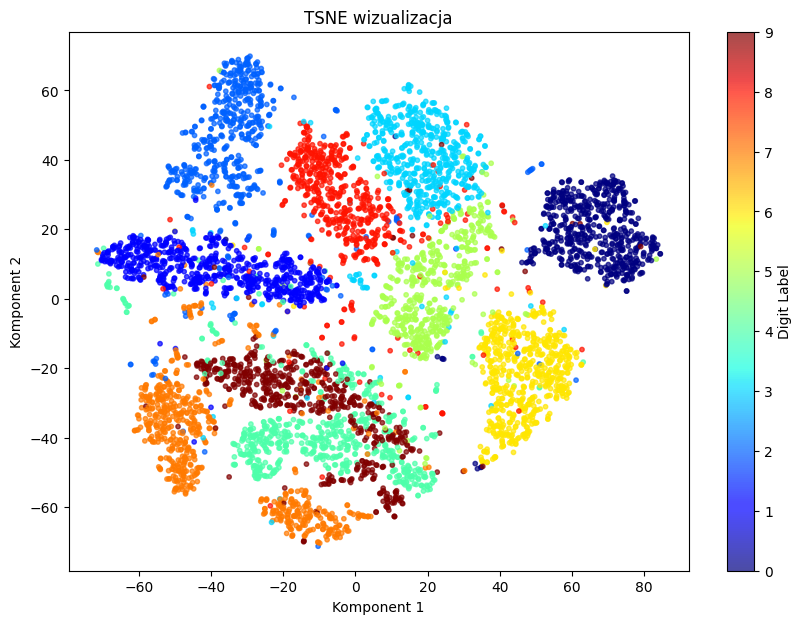

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

images = train_data.images[:6000]
labels = train_data.labels[:6000]   

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(images)

plt.figure(figsize=(20, 14))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='jet', alpha=0.7, s=10)
plt.colorbar(scatter, label='Digit Label')
plt.title("TSNE wizualizacja")
plt.xlabel("Komponent 1")
plt.ylabel("Komponent 2")

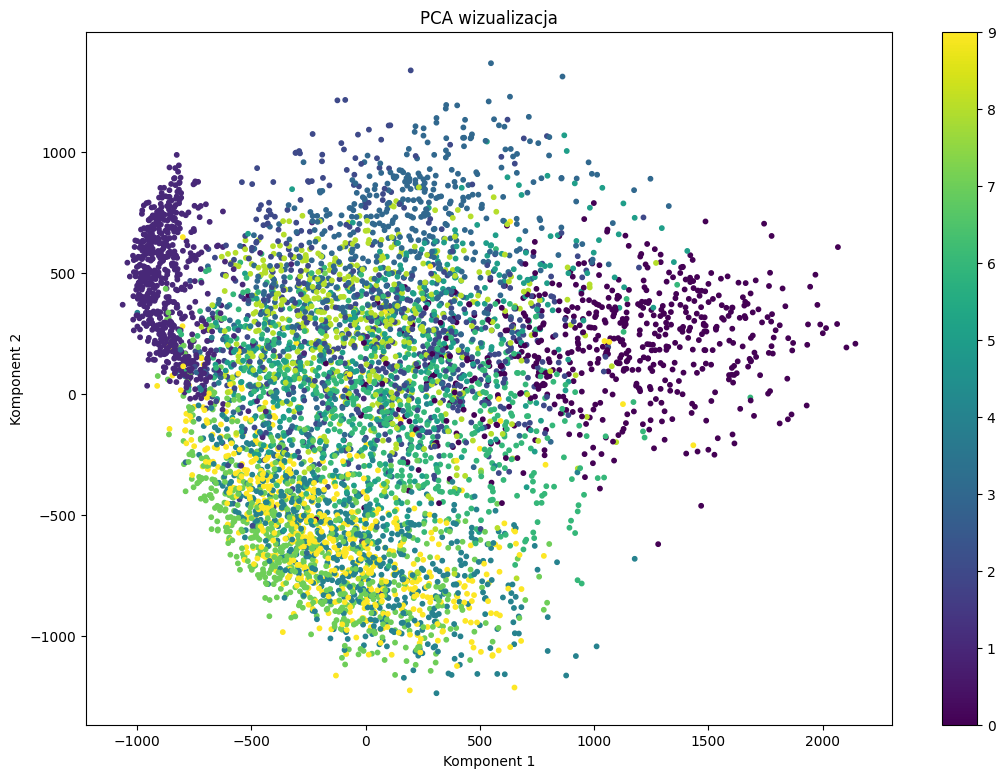

In [31]:
from sklearn.decomposition import PCA

images = train_data.images[:6000]
labels = train_data.labels[:6000]  

pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(images)

# Rysowanie wykresu
plt.figure(figsize=(13, 9))

# Zróbmy scatter plot, gdzie punkty mają różne kolory w zależności od klasy
scatter = plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=labels, cmap='viridis', s=10)
plt.colorbar(scatter)  # Pokazuje legendę kolorów dla klas
plt.title('PCA wizualizacja')
plt.xlabel('Komponent 1')
plt.ylabel('Komponent 2')
plt.show()


In [ ]:
# Podsumowanie
# 1. około 90-95% 
# 2. Logistic Regression jest najszybszy po refukcji wymiarów
# 3. TSNE jest najlepsza